<a href="https://colab.research.google.com/github/RiteshopShrivastava/Hierarchical_Clustering/blob/main/Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
Univ = pd.read_csv("Universities_Clustering.csv")


In [2]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [5]:
# user made function for normalization (min-max scaler)
def norm_func(i): 
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
# slicing from column at index 1, excluding Univ column bcz of non numeric value
df_norm = norm_func(Univ.iloc[:,1:])
df_norm


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [ ]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(Univ.iloc[:,1:]))
data 

,0,1,2,3,4,5
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


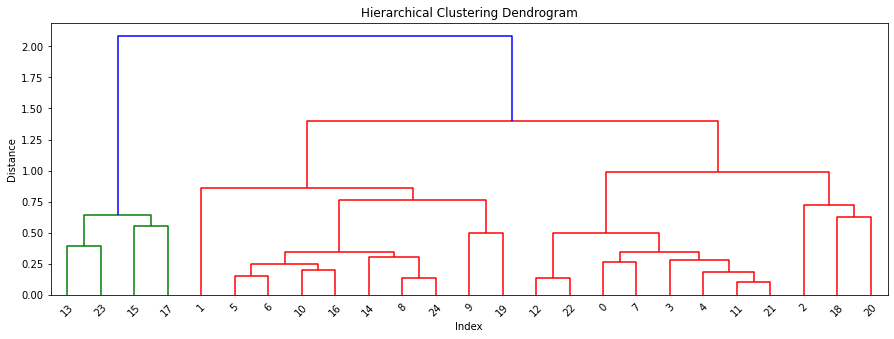

In [17]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Univ['clust']=cluster_labels # creating a  new column and assigning it to new column 
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,4
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [ ]:
Univ.iloc[:,1:].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
clust,,,,,,,
0,1348.888889,87.777778,27.111111,10.444444,38377.444444,92.888889,0.0
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000,1.0
2,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333,2.0
3,1272.500000,80.625000,33.000000,12.375000,22535.000000,91.125000,3.0
4,1415.000000,100.000000,25.000000,6.000000,63575.000000,81.000000,4.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Univ_subset = pd.DataFrame(scaler.fit_transform(Univ.iloc[:,1:]))
Univ_subset 

,0,1,2,3,4,5,6
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303,1.253905
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524,0.524891
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634,-1.662154
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229,1.253905
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587,1.253905
5,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982,-0.204124
6,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982,-0.204124
7,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945,1.253905
8,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339,-0.204124
9,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550,-0.204124


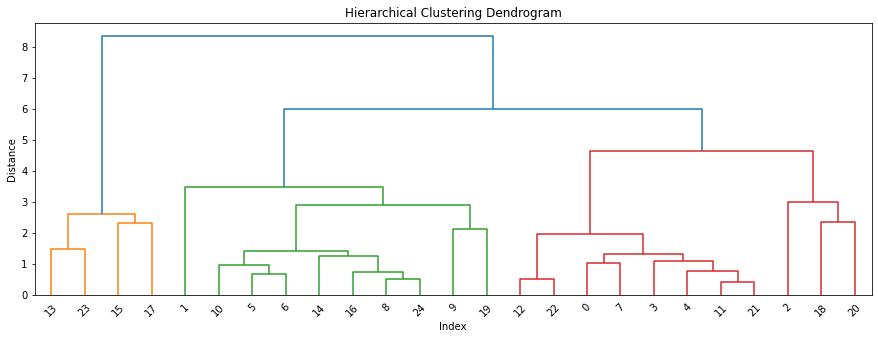

In [ ]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(Univ_subset, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(Univ_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Univ['clust']=cluster_labels # creating a  new column and assigning it to new column 
Univ 

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,4
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,4
4,Cornell,1280,83,33,13,21864,90,4
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,4
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,2
